In [1]:
%pylab inline
from ipywidgets import interact
import scipy.sparse as scsp
import scipy.sparse.linalg as scspl
from topobp import *

Populating the interactive namespace from numpy and matplotlib


# Topological insulators II/02: Majorana fermions and brading

**Task:** Berry-phase calculation for four-site y-turn braiding.

Some helper functions you may use for the braiding protocol:

In [2]:
def fOn(t,n):
    '''
    A piecewise function ...
    '''
    return ( 1*((t>=n)&(t<n+1)) + 0*((t<n)&(t>=n+1))); 

def fSwitchOn(t,n):
    return (t-n)*fOn(t,n);

def fSwitchOff(t,n):
    return fOn(t,n)*(1-fSwitchOn(t,n));

Let us explore them graphically

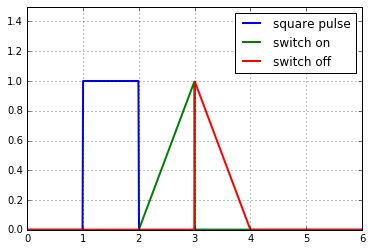

In [3]:
tvec = linspace(0,6,600)
fOn(tvec,1)
plot(tvec,fOn(tvec,1), label='square pulse',lw=2)
plot(tvec,fSwitchOn(tvec,2),label='switch on',lw=2)
plot(tvec,fSwitchOff(tvec,3),label='switch off',lw=2)
ylim(0,1.5)
grid()
legend();


*Hint:* You can use predifined functions in `topobp.py`

First let us define four fermionic annihilation $\hat{c}_i$ operators:

In [4]:
# construct the c operators; Nsp stands for the number of single-particle states, 
# that is 4 for our 4-site T-junction
Nsp = 4;
c = fermion_Fock_matrices(Nsp,dense=True);

Then the projectors for the even and odd fermion number subspaces:

In [5]:
# construct the projectors on the even and odd subpsaces
PEven , POdd =  even_odd_Fock_operators(Nsp,dense=True)
#Identity matrix 
IdentityMatrix=PEven+POdd

We shall also nead the functions that describe how different hopping and pairing amplitudes change as we vary time:

In [6]:
# define the functions that govern the braiding protocol
def ft23(t):
    return fSwitchOff(t,0) + fSwitchOn(t,3) + fOn(t,4) + fOn(t,5);           
def ft34(t): 
    return fOn(t, 0) + fOn(t, 1) + fSwitchOff(t, 2) + fSwitchOn(t, 5);
def ft13(t): 
    return fSwitchOn(t, 1) + fOn(t, 2) + fOn(t, 3) + fSwitchOff(t, 4);

Once we have the $\hat{c}_i$ operators we can build up a parameter dependent Hamiltonian that performs the braiding:

In [7]:
# construct the adiabatic Fock space Hamiltonian for the braiding procedure
def Braid_Fock_Ham(t):
    ham=ft23(t)*(c[1].H*c[2] + c[2].H*c[1] + c[1].H*c[2].H + c[2]*c[1]) +\
        ft34(t)*(c[2].H*c[3] + c[3].H*c[2] + c[2].H*c[3].H + c[3]*c[2]) +\
        ft13(t)*(c[0].H*c[2] + c[2].H*c[0] + 1.0j*c[0].H*c[2].H - 1.0j*c[2]*c[0]) +\
        (1-ft23(t))*c[1].H*c[1]+(1-ft34(t))*c[3].H*c[3]+(1-ft13(t))*c[0].H*c[0];
    return ham

Now we are ready to perform the braiding. Below we write a simple for loop and calculate the Berry's phase for the even and odd parity groundstate:

In [8]:
# loop for time points
# set the initial value of the even and odd projector products as the identity matrix
ProjectorProductEven = IdentityMatrix;
ProjectorProductOdd = IdentityMatrix;
taumin = 0.0;
taumax = 6.0;
taunum=300;
tran=linspace(taumin,taumax,taunum,endpoint=False)
for t in tran:
    [val,vec]=eigh(Braid_Fock_Ham(t))
    GSProjector=vec[:,0]*vec[:,0].H+vec[:,1]*vec[:,1].H
    ## construct the projectors of the even and odd ground states and update the projector product
    ProjectorProductEven = ProjectorProductEven*(PEven*GSProjector*PEven)
    ProjectorProductOdd = ProjectorProductOdd*(POdd*GSProjector*POdd)

# end of loop for time points

Finally we can check the values of the two calculated Berry's phases:

In [12]:
print(r"Berry's phase for the even subspace:",angle(ProjectorProductEven.trace()[0,0]))
print(r"Berry's phase for the odd subspace:",angle(ProjectorProductOdd.trace()[0,0]))
print(r'Numeeric value of $\pi/4$',pi/4)

Berry's phase for the even subspace: 0.785398163397
Berry's phase for the odd subspace: -0.785398163397
Numeeric value of $\pi/4$ 0.7853981633974483
